In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# Step 1: Load Dataset
file_path = r"C:\Users\bhard\OneDrive\Desktop\My all Projects\Predicting House Prices with Linear Regression\Housing.csv"
housing_data = pd.read_csv(file_path)

In [9]:
# Step 2: Data Exploration
# Display the first few rows of the dataset
print(housing_data.head())

# Basic statistics of the dataset
print(housing_data.describe())

# Check data types
print(housing_data.dtypes)

# Check for missing values
print(housing_data.isnull().sum())

# Handle missing values if any (example: dropping rows with missing values)
housing_data = housing_data.dropna()

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [10]:
# Step 3: Encode Categorical Variables
# Use one-hot encoding to convert categorical variables into numeric form
housing_data_encoded = pd.get_dummies(housing_data, drop_first=True)

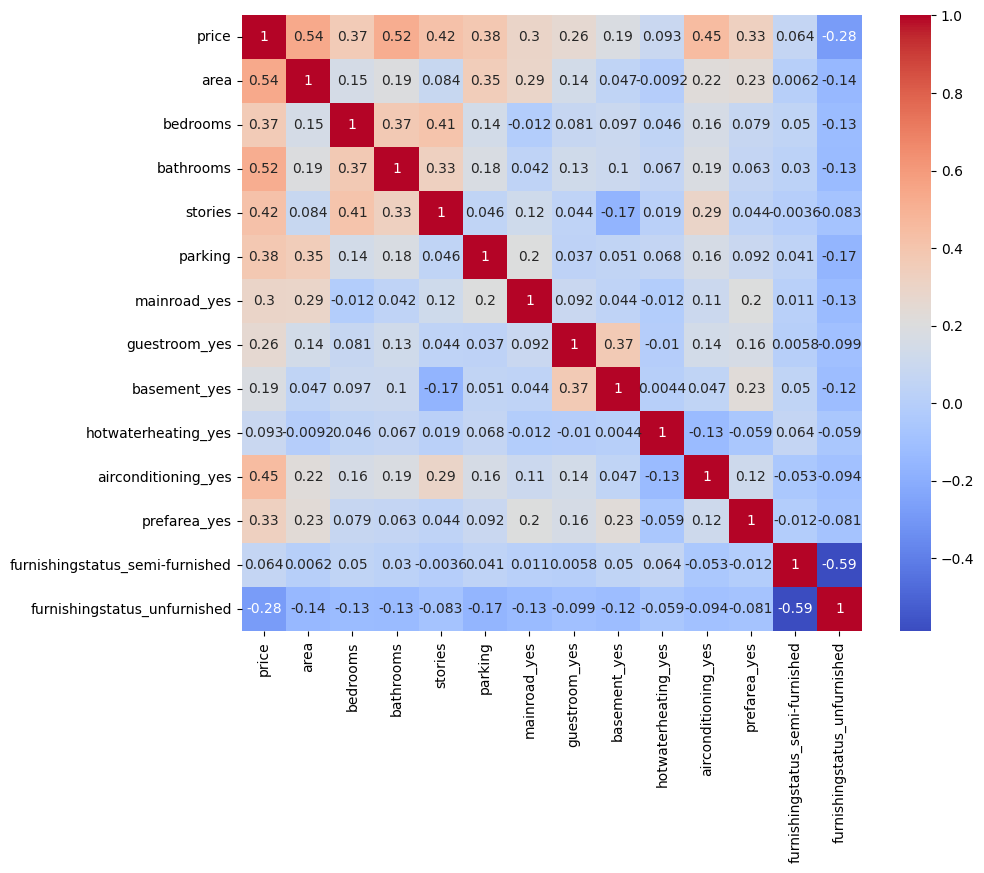

In [11]:
# Step 4: Correlation Matrix
# Correlation matrix to understand feature relationships
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Step 5: Feature Selection
# Assuming 'Price' is the target variable and others are features
X = housing_data_encoded.drop('price', axis=1)
y = housing_data_encoded['price']

In [15]:
# Step 6: Model Training
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Step 7: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1754318687330.6643
R-squared: 0.6529242642153184


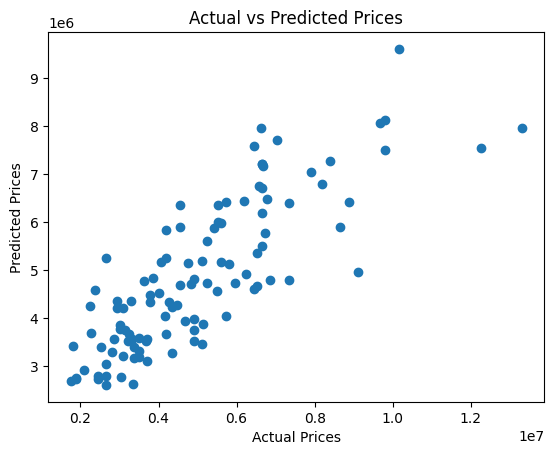

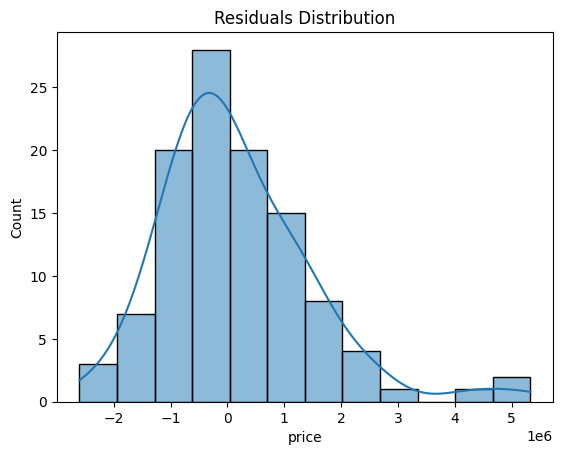

In [17]:
# Step 8: Visualization
# Scatter plot of Actual vs Predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()